<a href="https://colab.research.google.com/github/OhJin-Soo/code_practice/blob/main/tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.17.1


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print("train_images.shape = ", train_images.shape)
print("test_images.shape =", test_images.shape)
print("train_labels.shape =", train_labels.shape)
print("test_labels.shape =", test_labels.shape)

train_images.shape =  (60000, 28, 28)
test_images.shape = (10000, 28, 28)
train_labels.shape = (60000,)
test_labels.shape = (10000,)


In [7]:
num = train_images[0]
for i in range(20):
  for j in range(20):
    print("{:4d}".format(num[i][j]), end='')
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0
   0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154   0   0
   0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0   0   0   0   0
   0   0   0   0   0   0   0

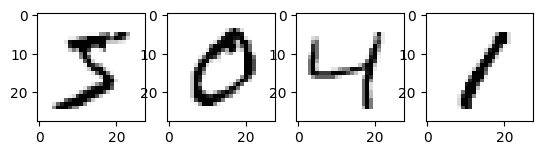

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.imshow(train_images[0], cmap="Greys")
ax2.imshow(train_images[1], cmap="Greys")
ax3.imshow(train_images[2], cmap="Greys")
ax4.imshow(train_images[3], cmap="Greys")

In [10]:
print("train_labels[:4] =", train_labels[:4])

train_labels[:4] = [5 0 4 1]


In [11]:
train_images, test_images = train_images / 255, test_images / 255

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1078 - loss: 2.3020
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1132 - loss: 2.3012
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1130 - loss: 2.3003
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1121 - loss: 2.2982
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1218 - loss: 2.2917


In [16]:
train_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n테스트 정확도:", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9803 - loss: 0.0644

테스트 정확도: 0.9803000092506409


In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)

print("\n테스트 정확도:", test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1118 - loss: 2.3017
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1160 - loss: 2.3008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1110 - loss: 2.3014
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1116 - loss: 2.3014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1115 - loss: 2.3014
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1123 - loss: 2.3012
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1126 - loss: 2.3012
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1145 - loss: 2.3011
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1119 - loss: 2.3015
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1134 - loss: 2.3012

테스트 정확도: 0.11349999904632568


In [62]:
test_images.shape

(10000, 28, 28)

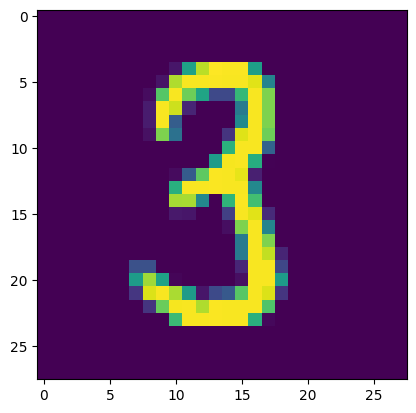

In [63]:
randIdx = np.random.randint(0, 6000)
plt.imshow(test_images[randIdx])

In [59]:
yhat = model.predict(test_images[randIdx])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(28, 28), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(28, 28), dtype=float32)
  • training=False
  • mask=None

In [64]:
pred = model.predict( test_images[randIdx][np.newaxis, :, :])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.09884566, 0.11082971, 0.10109211, 0.10413417, 0.09745318,
        0.09020448, 0.09807801, 0.10326865, 0.09739142, 0.09870256]],
      dtype=float32)

In [65]:
pred.argmax()

1

In [ ]:
randIdx = np.random.randint(0, 6000)
plt.imshow(test_images[randIdx])

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(1256, activation = "relu"),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)

print("\n테스트 정확도:", test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.1106 - loss: 2.3018
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.1123 - loss: 2.3015
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.1124 - loss: 2.3014
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.1121 - loss: 2.3013
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.1138 - loss: 2.3012
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.1116 - loss: 2.3013
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.1120 - loss: 2.3016
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.1131 - loss: 2.3015
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.1122 - loss: 2.3015
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.1113 - loss: 2.3015

테스트 정확도: 0.11349999904632568


In [23]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1256)                │         985,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         643,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,362,748 (20.46 MB)

 Trainable params: 1,787,582 (6.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,575,166 (13.64 MB)

In [66]:
def softmax(a):
  exp_of_a = np.exp(a)
  sum_exp = np.sum(exp_of_a)
  y = exp_of_a / sum_exp
  return y

a = np.array([0.5,4.1,2.5,5.6,1.2])
print("신경망의 예측값 :",a)
print("소프트맥스 함수의 출력 :",softmax(a))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [67]:
print("소프트맥스 함수의 최대값 :", np.max(softmax(a)))

소프트맥스 함수의 최대값 : 0.7772704668966948


In [68]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

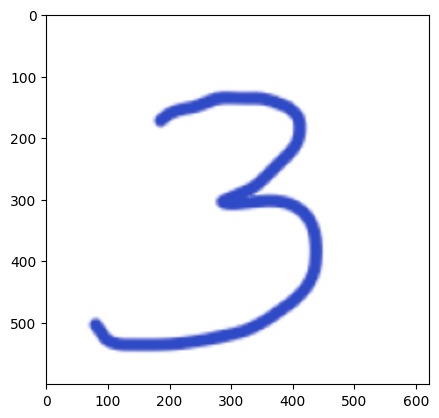

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./myNumber.png')
plt.imshow(img)

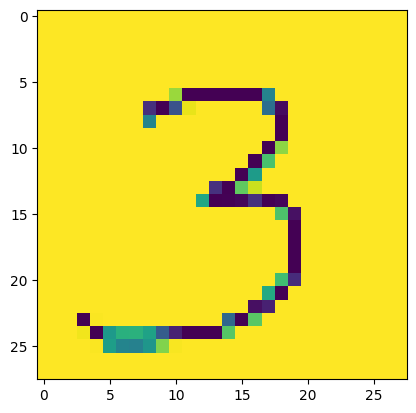

In [70]:
import cv2
img = cv2.imread('./myNumber.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28))
plt.imshow(img)

In [71]:
pred = model.predict( img[np.newaxis, :, :])
pred.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1

In [72]:
for i in range(28):
  for j in range(28):
    print("{:4d}".format(img[i][j]), end='')
  print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 229  80  80  80  80  80  80 158 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 104  80 124 249 255 255 255 255 255 143  85 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 159 255 255 255 255 255 255 255 255 255  80 255 255 255 255 255

In [73]:
img = (255 - img) / 255
pred = model.predict( img[np.newaxis, :, :])
pred.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1

In [76]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.2)
print("훈련용 데이터의 형태:", x_train.shape)
print("훈련용 데이터의 레이블 형태:", y_train.shape)
print("테스트용 데이터 형태:", x_test.shape)
print("테스트용 데이터의 레이블 형태:",y_test.shape)
print("개별 훈련 데이터의 형태:",x_train[0].shape)

훈련용 데이터의 형태: (120, 4)
훈련용 데이터의 레이블 형태: (120,)
테스트용 데이터 형태: (30, 4)
테스트용 데이터의 레이블 형태: (30,)
개별 훈련 데이터의 형태: (4,)


In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 30, batch_size = 5, verbose = 1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3691 - loss: 1.1251
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7417 - loss: 0.8529 
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7586 - loss: 0.7448 
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7084 - loss: 0.6743 
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6833 - loss: 0.6292 
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.5613 
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7479 - loss: 0.5289 
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7786 - loss: 0.5085 
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8246 - loss: 0.4839 
Epoch 10/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8401 - loss: 0.4528  
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8338 - loss: 0.4378 
Epoch 12/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

In [79]:
print("신경망 모델의 학습 결과 :")
eval_loss, eval_acc = model.evaluate(x_test,y_test)
print("붓꽃 데이터의 분류 정확도 :", eval_acc)

신경망 모델의 학습 결과 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9667 - loss: 0.2556
붓꽃 데이터의 분류 정확도 : 0.9666666388511658


In [82]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(3, activation = "softmax")
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist = model.fit(x_train, y_train, epochs = 30, batch_size = 5, verbose = 0)
print("신경망 모델의 학습 결과 :")
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print("붓꽃 데이터의 분류 정확도 :", eval_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


신경망 모델의 학습 결과 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 1.0000 - loss: 0.1143
붓꽃 데이터의 분류 정확도 : 1.0


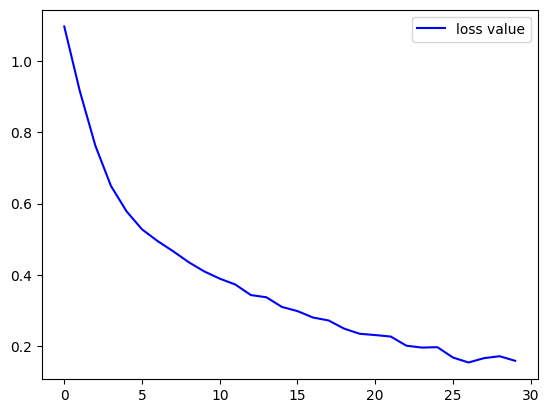

In [83]:
plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()

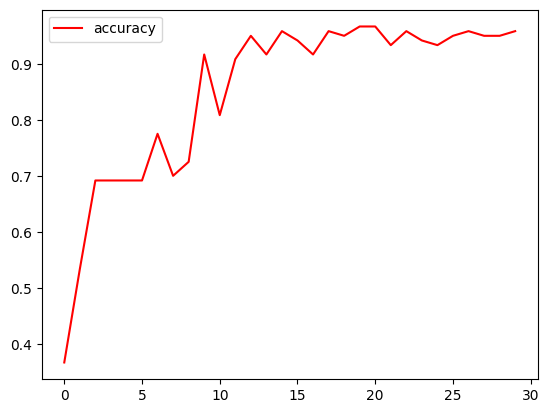

In [84]:
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

In [85]:
model.save('./iris_model.h5')

In [86]:
!ls -1

iris_model.h5
myNumber.png
sample_data


In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
model.save('./drive/MyDrive/iris_model.h5')

In [90]:
loaded = keras.models.load_model('./drive/MyDrive/iris_model.h5')
loaded.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 60)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225 (8.70 KB)

 Trainable params: 2,223 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [92]:
x_train = np.array([[0],[1],[2]])
y_train = 3 * x_train + 1

x_test = np.array([[3],[4],[5]])
y_test = 3 * x_test + 1

print('x_train :', x_train.flatten(), ' y_train :', y_train.flatten())
print('x_test :', x_test.flatten(), ' y_test :', y_test.flatten())


x_train : [0 1 2]  y_train : [1 4 7]
x_test : [3 4 5]  y_test : [10 13 16]


In [93]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, input_shape = (1,)))
model.add(keras.layers.Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'sgd',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 30, batch_size=2)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 25.8314  
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 9.4593 
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3889 - loss: 2.6757 
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3889 - loss: 0.7041 
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2222 - loss: 0.2836     
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3889 - loss: 0.0783 
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2222 - loss: 0.0280     
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2222 - loss: 0.0239    
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3889 - loss: 0.0274 
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3889 - loss: 0.0247 
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3889 - loss: 0.0227 
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

In [95]:
pred = model.predict(x_test)
print('x_test :', x_test.flatten(),' 예측 :', pred.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
x_test : [3 4 5]  예측 : [ 9.94173  12.895164 15.848597]


소감 : 뭔가 복잡해 보이지만, 층을 만들고, 활성화함수 넣어 준게 끝이다. 딥러닝은 블랙박스 모델이라고 한다. 그렇다면, 이해와, 각 활성화함수의 동작방식을 알아야 겠지.